In [1]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Activate the first option if whole column width is necessary and the second to make all columns visible
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

## I. Import the processed dataset

In [3]:
#Get the report and store it into a dataframe. Check what columns are included in the file
report = pd.read_csv('weather_consolidated.csv')
print(report.columns)
print(report.shape)
print(report.dtypes)

Index(['Station', 'latitude', 'longitude', 'time', 'cloudCover', 'humidity',
       'temperature', 'temperatureMax', 'temperatureMaxTime', 'temperatureMin',
       'temperatureMinTime', 'uvIndex', 'precipIntensitycurrent',
       'precipTypecurrent', 'precipAccumulationcurrent', 'precipIntensityMax',
       'precipIntensityMaxTime', 'precipType', 'precipAccumulation', 'units'],
      dtype='object')
(128196, 20)
Station                       object
latitude                     float64
longitude                    float64
time                           int64
cloudCover                   float64
humidity                     float64
temperature                  float64
temperatureMax               float64
temperatureMaxTime             int64
temperatureMin               float64
temperatureMinTime             int64
uvIndex                        int64
precipIntensitycurrent       float64
precipTypecurrent             object
precipAccumulationcurrent    float64
precipIntensityMax           

In [4]:
report.head(5)

,Station,latitude,longitude,time,cloudCover,humidity,temperature,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,uvIndex,precipIntensitycurrent,precipTypecurrent,precipAccumulationcurrent,precipIntensityMax,precipIntensityMaxTime,precipType,precipAccumulation,units
0,Stapleford,51.835865,-0.100632,1167609600,0.44,0.81,8.67,9.22,1167658020,3.89,1167706500,0,0.0,0,0.0,1.2044,1167678180,rain,0.0,SI
1,Stapleford,51.835865,-0.100632,1167638400,0.44,0.84,5.73,9.22,1167658020,3.89,1167706500,0,0.0,0,0.0,1.2044,1167678180,rain,0.0,SI
2,Stapleford,51.835865,-0.100632,1167667200,0.35,0.71,8.22,9.22,1167658020,3.89,1167706500,0,0.0,0,0.0,1.2044,1167678180,rain,0.0,SI
3,Stapleford,51.835865,-0.100632,1167696000,0.00,0.82,4.22,9.09,1167746820,4.53,1167780600,0,0.0,0,0.0,0.0000,0,0,0.0,SI
4,Stapleford,51.835865,-0.100632,1167724800,0.19,0.79,5.17,9.09,1167746820,4.53,1167780600,0,0.0,0,0.0,0.0000,0,0,0.0,SI


In [5]:
report.describe()

,latitude,longitude,time,cloudCover,humidity,temperature,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,uvIndex,precipIntensitycurrent,precipAccumulationcurrent,precipIntensityMax,precipIntensityMaxTime,precipAccumulation
count,128196.000000,128196.000000,1.281960e+05,128196.000000,128196.000000,128196.000000,128196.000000,1.281960e+05,128196.000000,1.281960e+05,128196.000000,125527.000000,125527.000000,128196.000000,1.281960e+05,125527.000000
mean,51.858315,-0.242466,1.372709e+09,0.521170,0.809423,10.711799,14.607476,1.372730e+09,7.120725,1.372779e+09,3.329589,0.045477,0.000375,0.321354,7.840540e+08,0.003784
std,0.094678,0.225837,1.184229e+08,0.328322,0.142198,6.143968,6.360951,1.184230e+08,5.014556,1.184232e+08,2.222718,0.229933,0.009963,0.850774,7.016360e+08,0.075383
min,51.675986,-0.613180,1.167610e+09,0.000000,0.220000,-10.050000,-2.570000,1.167657e+09,-11.320000,1.167696e+09,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,51.783064,-0.376154,1.270159e+09,0.190000,0.740000,6.300000,9.800000,1.270201e+09,3.420000,1.270251e+09,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,51.875576,-0.287471,1.372709e+09,0.540000,0.850000,10.650000,14.500000,1.372735e+09,7.350000,1.372781e+09,3.000000,0.000000,0.000000,0.008500,1.229213e+09,0.000000
75%,51.929085,-0.100632,1.475258e+09,0.750000,0.920000,15.020000,19.400000,1.475268e+09,11.010000,1.475320e+09,5.000000,0.000000,0.000000,0.335200,1.431648e+09,0.000000
max,51.989540,0.152830,1.577808e+09,1.000000,1.000000,35.500000,36.830000,1.577801e+09,21.080000,1.577866e+09,9.000000,15.026100,1.354700,32.191800,1.577824e+09,5.000000


In [6]:
report['date'] = pd.to_datetime(report['time'],unit='s')

In [7]:
report['year'] = report['date'].dt.year

In [8]:
report.head(5)

,Station,latitude,longitude,time,cloudCover,humidity,temperature,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,uvIndex,precipIntensitycurrent,precipTypecurrent,precipAccumulationcurrent,precipIntensityMax,precipIntensityMaxTime,precipType,precipAccumulation,units,date,year
0,Stapleford,51.835865,-0.100632,1167609600,0.44,0.81,8.67,9.22,1167658020,3.89,1167706500,0,0.0,0,0.0,1.2044,1167678180,rain,0.0,SI,2007-01-01 00:00:00,2007
1,Stapleford,51.835865,-0.100632,1167638400,0.44,0.84,5.73,9.22,1167658020,3.89,1167706500,0,0.0,0,0.0,1.2044,1167678180,rain,0.0,SI,2007-01-01 08:00:00,2007
2,Stapleford,51.835865,-0.100632,1167667200,0.35,0.71,8.22,9.22,1167658020,3.89,1167706500,0,0.0,0,0.0,1.2044,1167678180,rain,0.0,SI,2007-01-01 16:00:00,2007
3,Stapleford,51.835865,-0.100632,1167696000,0.00,0.82,4.22,9.09,1167746820,4.53,1167780600,0,0.0,0,0.0,0.0000,0,0,0.0,SI,2007-01-02 00:00:00,2007
4,Stapleford,51.835865,-0.100632,1167724800,0.19,0.79,5.17,9.09,1167746820,4.53,1167780600,0,0.0,0,0.0,0.0000,0,0,0.0,SI,2007-01-02 08:00:00,2007


In [9]:
report['Station'].value_counts()

Lilley                   14244
Offley Road              14244
Bish Stortford Bypass    14244
Cow Roast                14244
Hay Street               14244
Stapleford               14244
Baldock                  14244
Maylands                 14244
High Cross               14244
Name: Station, dtype: int64

In [10]:
Hay_Street = report.loc[report['Station']=='Hay Street']
Offley_Road = report.loc[report['Station']=='Offley Road']
Baldock = report.loc[report['Station']=='Baldock']
Bish_Stortford = report.loc[report['Station']=='Bish Stortford Bypass']
High_Cross = report.loc[report['Station']=='High Cross']
Stapleford = report.loc[report['Station']=='Stapleford']
Maylands = report.loc[report['Station']=='Maylands']
Cow_Roast = report.loc[report['Station']=='Cow Roast']
Lilley = report.loc[report['Station']=='Lilley']

In [11]:
Hay_Street.columns

Index(['Station', 'latitude', 'longitude', 'time', 'cloudCover', 'humidity',
       'temperature', 'temperatureMax', 'temperatureMaxTime', 'temperatureMin',
       'temperatureMinTime', 'uvIndex', 'precipIntensitycurrent',
       'precipTypecurrent', 'precipAccumulationcurrent', 'precipIntensityMax',
       'precipIntensityMaxTime', 'precipType', 'precipAccumulation', 'units',
       'date', 'year'],
      dtype='object')

C:\Users\J FernandezGomez\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Temperature at the time of sampling')

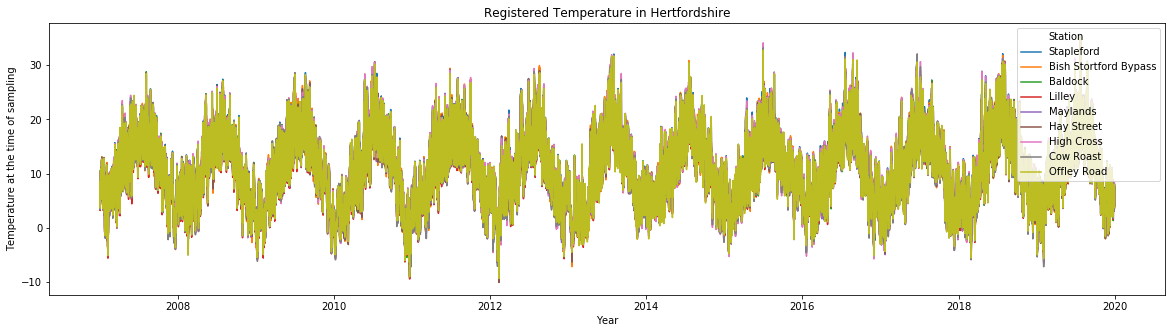

In [12]:
#Plot the current temperature throughout the 2007-2020 period
plt.figure(figsize=(20, 5))
ax = sns.lineplot(x='date', y= 'temperature', data=report, hue = 'Station')
ax.set_title('Registered Temperature in Hertfordshire')

plt.legend(loc='upper right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature at the time of sampling')

Text(0, 0.5, 'Max precipitation of the day')

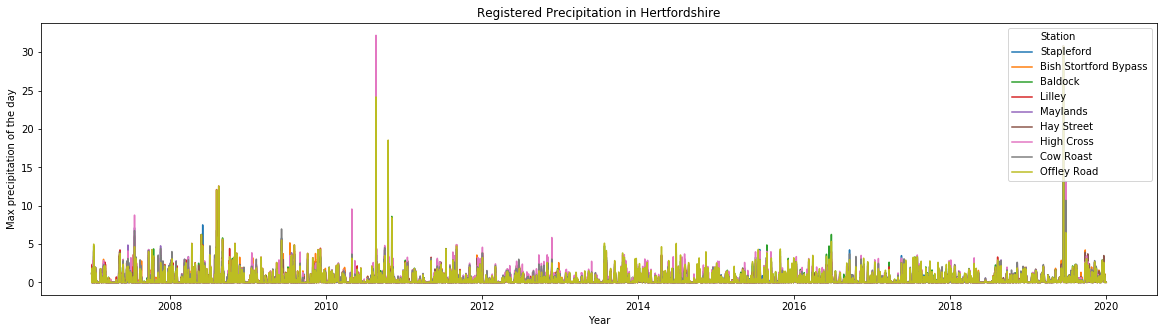

In [13]:
#Plot the current precipitation throughout the period
plt.figure(figsize=(20, 5))
ax = sns.lineplot(x='date', y= 'precipIntensityMax', data=report, hue = 'Station')
ax.set_title('Registered Precipitation in Hertfordshire')

plt.legend(loc='upper right')
ax.set_xlabel('Year')
ax.set_ylabel('Max precipitation of the day')

In [14]:
Stapleford.head(10)

,Station,latitude,longitude,time,cloudCover,humidity,temperature,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,uvIndex,precipIntensitycurrent,precipTypecurrent,precipAccumulationcurrent,precipIntensityMax,precipIntensityMaxTime,precipType,precipAccumulation,units,date,year
0,Stapleford,51.835865,-0.100632,1167609600,0.44,0.81,8.67,9.22,1167658020,3.89,1167706500,0,0.0,0,0.0,1.2044,1167678180,rain,0.0,SI,2007-01-01 00:00:00,2007
1,Stapleford,51.835865,-0.100632,1167638400,0.44,0.84,5.73,9.22,1167658020,3.89,1167706500,0,0.0,0,0.0,1.2044,1167678180,rain,0.0,SI,2007-01-01 08:00:00,2007
2,Stapleford,51.835865,-0.100632,1167667200,0.35,0.71,8.22,9.22,1167658020,3.89,1167706500,0,0.0,0,0.0,1.2044,1167678180,rain,0.0,SI,2007-01-01 16:00:00,2007
3,Stapleford,51.835865,-0.100632,1167696000,0.00,0.82,4.22,9.09,1167746820,4.53,1167780600,0,0.0,0,0.0,0.0000,0,0,0.0,SI,2007-01-02 00:00:00,2007
4,Stapleford,51.835865,-0.100632,1167724800,0.19,0.79,5.17,9.09,1167746820,4.53,1167780600,0,0.0,0,0.0,0.0000,0,0,0.0,SI,2007-01-02 08:00:00,2007
5,Stapleford,51.835865,-0.100632,1167753600,0.52,0.73,8.50,9.09,1167746820,4.53,1167780600,0,0.0,0,0.0,0.0000,0,0,0.0,SI,2007-01-02 16:00:00,2007
6,Stapleford,51.835865,-0.100632,1167782400,0.69,0.88,4.88,11.66,1167832980,8.05,1167897600,0,0.0,0,0.0,0.3902,1167859080,rain,0.0,SI,2007-01-03 00:00:00,2007
7,Stapleford,51.835865,-0.100632,1167811200,0.76,0.89,7.98,11.66,1167832980,8.05,1167897600,0,0.0,0,0.0,0.3902,1167859080,rain,0.0,SI,2007-01-03 08:00:00,2007
8,Stapleford,51.835865,-0.100632,1167840000,0.75,0.85,10.68,11.66,1167832980,8.05,1167897600,0,0.0,0,0.0,0.3902,1167859080,rain,0.0,SI,2007-01-03 16:00:00,2007
9,Stapleford,51.835865,-0.100632,1167868800,0.67,0.85,10.68,10.96,1167913080,7.47,1167962940,1,0.0,0,0.0,0.0000,0,0,0.0,SI,2007-01-04 00:00:00,2007


In [15]:
out = pd.cut(report['Distance_between_Features'], bins=10)
out.value_counts().reindex(out.cat.categories)

KeyError: 'Distance_between_Features'

In [ ]:
report['Station'].value_counts()